In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import KernelPCA

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = ""
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def draw_pic(df, labels=None, filename='none'):
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df.values)
    if labels is None:
        plt.scatter(df_pca[:, 0], df_pca[:, 1], s=0.2)
    else:
        plt.scatter(df_pca[:, 0], df_pca[:, 1], s=0.2, c=1.0*labels)
    plt.savefig('./images/' + filename + '.png')

In [2]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

# Pre-processing

In [3]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

student_raw = pd.read_csv('./data/click_count.csv')
student_raw = student_raw.set_index('id_student')
student_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26074 entries, 6516 to 2698588
Data columns (total 20 columns):
dataplus          26074 non-null int64
dualpane          26074 non-null int64
externalquiz      26074 non-null int64
folder            26074 non-null int64
forumng           26074 non-null int64
glossary          26074 non-null int64
homepage          26074 non-null int64
htmlactivity      26074 non-null int64
oucollaborate     26074 non-null int64
oucontent         26074 non-null int64
ouelluminate      26074 non-null int64
ouwiki            26074 non-null int64
page              26074 non-null int64
questionnaire     26074 non-null int64
quiz              26074 non-null int64
repeatactivity    26074 non-null int64
resource          26074 non-null int64
sharedsubpage     26074 non-null int64
subpage           26074 non-null int64
url               26074 non-null int64
dtypes: int64(20)
memory usage: 4.2 MB


In [20]:
student_raw.describe()

,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
count,26074.000000,26074.000000,26074.000000,26074.000000,26074.000000,26074.000000,26074.000000,26074.000000,26074.000000,26074.000000,26074.000000,26074.000000,26074.000000,26074.000000,26074.000000,26074.000000,26074.000000,26074.000000,26074.000000,26074.000000
mean,0.371328,0.595996,1.455933,0.016108,234.613638,2.461839,195.878500,0.336389,2.605929,292.121309,1.141290,20.335468,1.940362,1.560558,165.448723,0.000345,31.224668,0.005791,96.263788,16.787911
std,2.526527,2.361398,5.548003,0.171318,495.144938,28.487753,264.189996,1.466413,7.079356,480.018118,6.266158,59.808478,4.900750,4.752877,362.015263,0.033349,41.788359,0.102537,130.461437,29.434305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,46.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,14.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,87.000000,0.000000,120.000000,0.000000,0.000000,93.000000,0.000000,0.000000,0.000000,0.000000,49.000000,0.000000,19.000000,0.000000,44.000000,7.000000
75%,0.000000,0.000000,0.000000,0.000000,255.000000,0.000000,252.000000,0.000000,2.000000,362.000000,0.000000,14.000000,1.000000,0.000000,149.000000,0.000000,40.000000,0.000000,131.000000,22.000000
max,101.000000,68.000000,218.000000,6.000000,9978.000000,2436.000000,7098.000000,32.000000,197.000000,6771.000000,196.000000,1708.000000,284.000000,59.000000,10743.000000,4.000000,819.000000,6.000000,1603.000000,1819.000000


0.965662990996


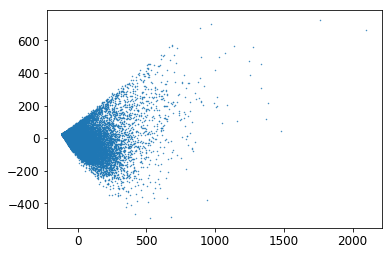

In [5]:
print(hopkins(student_raw))
draw_pic(student_raw)

## From activity type to Learning style

In [4]:
df = student_raw
student_8f = pd.DataFrame(index = df.index)
student_8f['motivational']=df['homepage'].apply(lambda x: float(x)/3)+df['externalquiz'].apply(lambda x: float(x)/3)+df['quiz'].apply(lambda x: float(x)/3)
student_8f['communicational']=df['forumng'].apply(lambda x: float(x)/2)+df['oucollaborate'].apply(lambda x: float(x)/2)
student_8f['visual']=df['url'].apply(lambda x: float(x)/2)+df['ouelluminate'].apply(lambda x: float(x)/2)
student_8f['verbal']=df['resource'].apply(lambda x: float(x)/2)+df['ouwiki'].apply(lambda x: float(x)/2)
student_8f['sensing']=df['dualpane']
student_8f['intuitive']=df['ouwiki']
student_8f['sequential']=df['subpage']
student_8f['global']=df['oucontent'].apply(lambda x: float(x)/3)+df['page'].apply(lambda x: float(x)/3)+df['repeatactivity'].apply(lambda x: float(x)/3)
student_8f.describe()

,motivational,communicational,visual,verbal,sensing,intuitive,sequential,global
count,26074.000000,26074.000000,26074.000000,26074.000000,26074.000000,26074.000000,26074.000000,26074.000000
mean,120.927719,118.609784,8.964601,25.780068,0.595996,20.335468,96.263788,98.020672
std,179.289766,248.381887,15.799374,38.985257,2.361398,59.808478,130.461437,160.946917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,8.500000,0.500000,4.000000,0.000000,0.000000,14.000000,4.666667
50%,64.000000,44.500000,4.000000,12.500000,0.000000,0.000000,44.000000,31.333333
75%,144.666667,129.000000,11.500000,32.000000,0.000000,14.000000,131.000000,121.333333
max,4464.666667,4994.000000,935.000000,860.500000,68.000000,1708.000000,1603.000000,2272.666667


### Remove outliers and scaling

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.neighbors import LocalOutlierFactor #http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor
from sklearn.ensemble import IsolationForest #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest
from sklearn.preprocessing import MinMaxScaler

def array2df(array, df):
    df_copy = pd.DataFrame(data=array,
                         index = df.index,
                         columns = df.columns)
    return df_copy

df = student_8f
detecter = LocalOutlierFactor(n_neighbors=50, contamination=0.01)
#outliers = detecter.fit_predict(df)
#draw_pic(df, outliers)
df['lof'] = detecter.fit_predict(df)
student_scaled = df[df['lof']>0]
print(len(student_scaled))
student_scaled = student_scaled.drop(columns=['lof'])
#student_scaled = student_8f

scaler = MinMaxScaler()
scaler.fit(student_scaled)
student_scaled = array2df(scaler.transform(student_scaled), student_scaled)
student_scaled = array2df(normalize(student_scaled, norm='l2'), student_scaled)

25813


In [8]:
student_scaled.describe()

,motivational,communicational,visual,verbal,sensing,intuitive,sequential,global
count,25813.000000,25813.000000,25813.000000,25813.000000,25813.000000,25813.000000,25813.000000,25813.000000
mean,0.360742,0.186168,0.160240,0.355448,0.037631,0.073803,0.395538,0.384838
std,0.214986,0.212339,0.175021,0.238500,0.131219,0.146747,0.227703,0.309542
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.199819,0.039207,0.032020,0.162698,0.000000,0.000000,0.215285,0.078659
50%,0.313652,0.111609,0.106614,0.316064,0.000000,0.000000,0.399301,0.346651
75%,0.478300,0.244932,0.225618,0.536843,0.000000,0.073001,0.558673,0.665673
max,1.000000,1.000000,0.981384,1.000000,0.992302,0.701248,1.000000,1.000000


0.904983802576


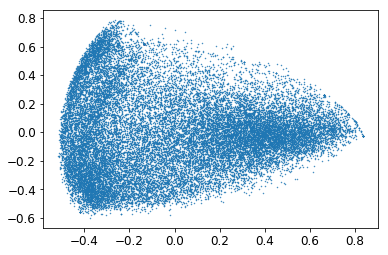

In [6]:
print(hopkins(student_scaled))
draw_pic(student_scaled)

Saving figure studentDataPre1


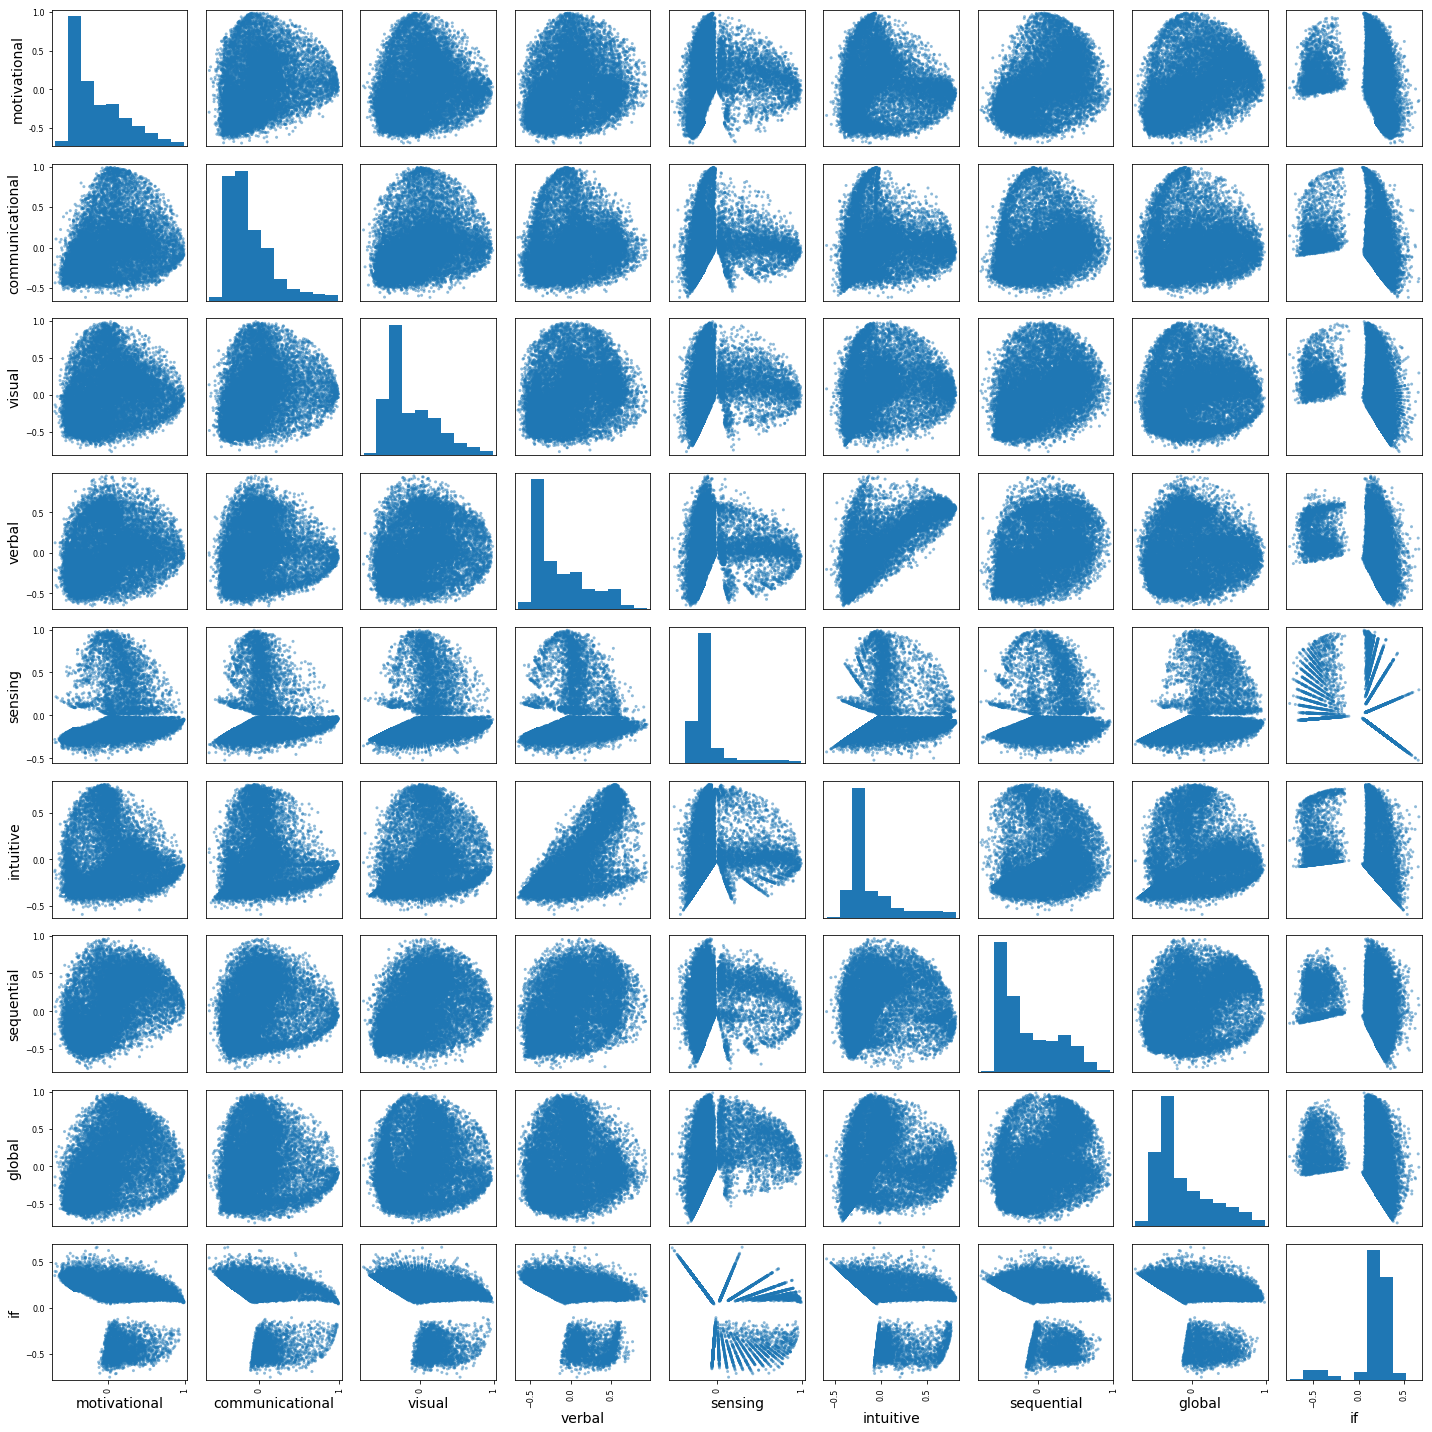

In [69]:
from pandas.plotting import scatter_matrix
student_8f = student_scaled
scatter_matrix(student_8f, figsize=(20, 20))
save_fig("studentDataPre1")

### K-means

In [16]:
from sklearn.cluster import KMeans

def clustering_kmeans(df, k=5):
    cluster_algo = KMeans(n_clusters=k, init='k-means++')
    cluster_algo.fit(df)
    return cluster_algo.labels_

Clustering... 3
Clustering... 4
Clustering... 5
Clustering... 6
Clustering... 7
Clustering... 8
Clustering... 9
Clustering... 10


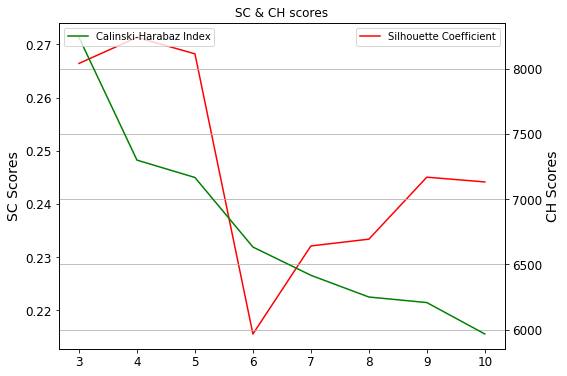

Max SC: 0.271312857823 , K = 1
Max CH: 8239.02168675 , K = 0


In [8]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score

def drawEvaluationGraph(params, sc_scores, ch_scores, paramname):
    fig = plt.figure(figsize=(8,6))
    ax_sc = fig.add_subplot(111)
    ax_sc.plot(params, sc_scores, 'r', label="Silhouette Coefficient")
    ax_sc.legend(loc=1)
    ax_sc.set_ylabel('SC Scores')
    ax_ch = ax_sc.twinx()
    ax_ch.plot(params, ch_scores, 'g', label="Calinski-Harabaz Index")
    ax_ch.legend(loc=2)
    ax_ch.set_ylabel('CH Scores')
    ax_ch.set_xlabel(paramname);
    plt.title('SC & CH scores')
    plt.grid(params)
    plt.show()
    print('Max SC:', max(sc_scores), ', K =',sc_scores.index(max(sc_scores)))
    print('Max CH:', max(ch_scores), ', K =',ch_scores.index(max(ch_scores)))

student_8f = student_scaled
labels_list = []
sc_score_list = []
ch_score_list = []
param_list = range(3, 11, 1)
for i in param_list:
    print('Clustering...', i)
    labels = clustering_kmeans(student_8f, i)
    labels_list.append(labels)
    sc_score_list.append(silhouette_score(student_8f, labels, metric='euclidean'))
    ch_score_list.append(calinski_harabaz_score(student_8f, labels))
drawEvaluationGraph(param_list, sc_score_list, ch_score_list, 'n_cluster')

In [9]:
print(sc_score_list)
print(ch_score_list)

[0.26642830354025238, 0.27131285782320136, 0.26823459598292948, 0.21552804678474627, 0.23208980925970155, 0.23336465687480074, 0.24502958527808399, 0.24413035145541589]
[8239.0216867541403, 7299.0426923149535, 7165.7933217264454, 6632.9175681008401, 6416.176046021852, 6249.7549887492241, 6207.2030857141799, 5966.49629566967]


### Stability

In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics.pairwise import euclidean_distances
import math
from sklearn.cluster import KMeans

np.random.seed(42)
def stability(cluster_algo, df, k=5, n=10):
    results = pd.DataFrame(-1, index = df.index, columns=list(map(lambda i: 'col'+str(i), range(1,n+1))))
    kfold = KFold(n_splits=n)
    i=1
    for train_indices, test_indices in kfold.split(df): #注意index是否一致
        train_set = df.iloc[train_indices]
        results.loc[train_set.index,'col'+str(i)] = cluster_algo.fit_predict(train_set)
        i+=1
    #计算
    indexs_I = []
    indexs_J = []
    overlap_score = []
    for i in range(1,n+1):
        for j in range(i+1,n+1):
            indexs_I.clear()
            indexs_J.clear()
            overlap = 0.0
            for cluster in range(0,k):
                indexs_I.append(set(results.loc[results['col'+str(i)]==cluster].index))
                indexs_J.append(set(results.loc[results['col'+str(j)]==cluster].index))
            for index_set_I in indexs_I:
                max_overlap = 0.0
                for index_set_J in indexs_J:
                    overlap_per = float(len(index_set_I & index_set_J))/len(index_set_I | index_set_J)
                    if overlap_per > max_overlap: max_overlap = overlap_per
                overlap += max_overlap
            overlap_score.append(overlap/k)
    return np.mean(overlap_score), np.std(overlap_score)

def parameter_tunning_stability(df,branch_list,threshold_list,n_clusters_list):
    results = pd.DataFrame(columns=['branching_factor','threshold','n_clusters','stability_mean','stability_std'])
    record = pd.DataFrame(columns=['branching_factor','threshold','n_clusters','stability_mean','stability_std'], index=range(0,1))
    for factor in branch_list:
        record.iloc[0]['branching_factor'] = factor
        for x in threshold_list:
            record.iloc[0]['threshold'] = float(x)/10
            for k in n_clusters_list:
                record.iloc[0]['n_clusters'] = k
                brc = Birch(branching_factor=factor, n_clusters=k, threshold=float(x)/10, compute_labels=True)
                record.iloc[0]['stability_mean'], record.iloc[0]['stability_std'] = stability(brc, df, k, n=10)
                results = results.append(record, ignore_index=True)
    return results

Clustering... 3
Clustering... 4
Clustering... 5
Clustering... 6
Clustering... 7
Clustering... 8
Clustering... 9
Clustering... 10


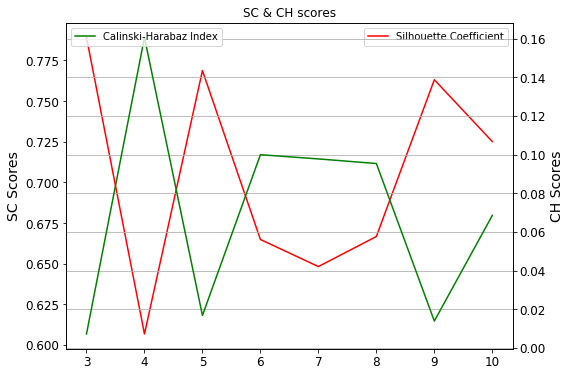

Max SC: 0.789080940617 , K = 0
Max CH: 0.160553885611 , K = 1


In [11]:
student_8f = student_scaled
labels_list = []
sc_score_list = []
ch_score_list = []
param_list = range(3, 11, 1)
for i in param_list:
    print('Clustering...', i)
    kmeans = KMeans(n_clusters=i, init='k-means++')
    mean, std = stability(kmeans, student_8f, k=i, n=10)
    sc_score_list.append(mean)
    ch_score_list.append(std)
drawEvaluationGraph(param_list, sc_score_list, ch_score_list, 'n_cluster')

In [12]:
print(sc_score_list)
print(ch_score_list)

[0.78908094061651268, 0.60673245653335295, 0.76871667725352222, 0.66484506373510777, 0.64818842797641529, 0.666668932658108, 0.76307651351724026, 0.72505034392473489]
[0.0071856455258769072, 0.16055388561120548, 0.016774834189593482, 0.09990386581330965, 0.097734222740533644, 0.095355647298987239, 0.013872373132118945, 0.068500405245479276]


### Cross validation

In [11]:
from sklearn.model_selection import KFold
from sklearn.metrics.pairwise import euclidean_distances
import math

np.random.seed(42)
def crossval(df, k=5, n=10):
    distances = []
    kfold = KFold(n_splits=n)
    for train_indices, test_indices in kfold.split(df): #注意index是否一致
        train_set = df.iloc[train_indices]
        test_set = df.iloc[test_indices]
        sum_dist = 0.0
        cluster_algo = KMeans(n_clusters=k, init='k-means++')
        cluster_algo.fit(train_set)
        distance_matrix = euclidean_distances(test_set, cluster_algo.cluster_centers_)
        for i in range(len(test_set)):
            sum_dist += math.sqrt(min(distance_matrix[i]))
        distances.append(sum_dist)
    return np.mean(distances), np.std(distances)

Clustering... 3
Clustering... 4
Clustering... 5
Clustering... 6


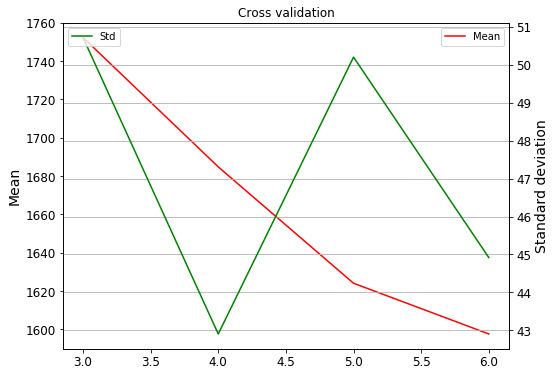

Min Mean: 1597.65351388 , K = 3
Min Std: 42.9062384814 , K = 1


In [12]:
def drawEvaluationGraph(params, sc_scores, ch_scores, paramname):
    fig = plt.figure(figsize=(8,6))
    ax_sc = fig.add_subplot(111)
    ax_sc.plot(params, sc_scores, 'r', label="Mean")
    ax_sc.legend(loc=1)
    ax_sc.set_ylabel('Mean')
    ax_ch = ax_sc.twinx()
    ax_ch.plot(params, ch_scores, 'g', label="Std")
    ax_ch.legend(loc=2)
    ax_ch.set_ylabel('Standard deviation')
    ax_ch.set_xlabel(paramname);
    plt.title('Cross validation')
    plt.grid(params)
    plt.show()
    print('Min Mean:', min(sc_scores), ', K =',sc_scores.index(min(sc_scores)))
    print('Min Std:', min(ch_scores), ', K =',ch_scores.index(min(ch_scores)))

student_8f = student_scaled
labels_list = []
sc_score_list = []
ch_score_list = []
param_list = range(3, 7, 1)
for i in param_list:
    print('Clustering...', i)
    mean, std = crossval(student_8f, k=i, n=10)
    sc_score_list.append(mean)
    ch_score_list.append(std)
drawEvaluationGraph(param_list, sc_score_list, ch_score_list, 'n_cluster')

SC: 0.219564075758
CH: 6645.53894287


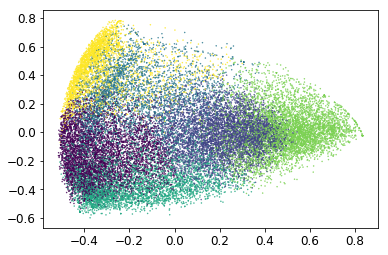

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score

df = student_scaled
student_labels = clustering_kmeans(df, 6)
print('SC:', silhouette_score(df, student_labels, metric='euclidean'))
print('CH:', calinski_harabaz_score(df, student_labels))
draw_pic(df, student_labels, 'weighted_l2_kmeans6')

In [18]:
student_scaled['cluster'] = student_labels
student_scaled.to_csv('./data/clustering_weighted_l2_kmeans6.csv')